# Zomato Data Analysis
#### Project Overview

The project explores Zomato restaurant data to analyze customer preferences,
ordering behavior, and ratings across online and offline modes. The analysis
focuses on restaurant types, customer votes, spending patterns of couples
ordering online, and rating comparisons to support data-driven promotional
strategies for Zomato.

## Business Objective
- Identify the most preferred restaurant types
- Analyze customer votes by restaurant type
- Understand rating distribution across restaurants
- Calculate average spending of couples ordering online
- Compare ratings between online and offline orders
- Identify restaurant types with higher offline orders

## Dataset Description
- Source: Kaggle
- Rows: 148
- Columns: 7
- Columns:
   - name
   - online_order
   - book_table
   - rate
   - votes
   - approx_cost(for two people)
   - listed_in(type)

## importing libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Creating dataframe

In [40]:
dataframe = pd.read_csv("Zomato data .csv")
print (dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [41]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## Converting the data type of column - rate

In [43]:
def Ratings(value):
    value = str(value).split('/')
    value = value[0]
    return float (value)

dataframe['rate'] = dataframe['rate'].apply(Ratings)
print (dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [44]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Type of Restaurant

In [45]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


## Q.1 What type of restaurant do the majority of customers order from?

Text(0.5, 0, 'type of restaurant')

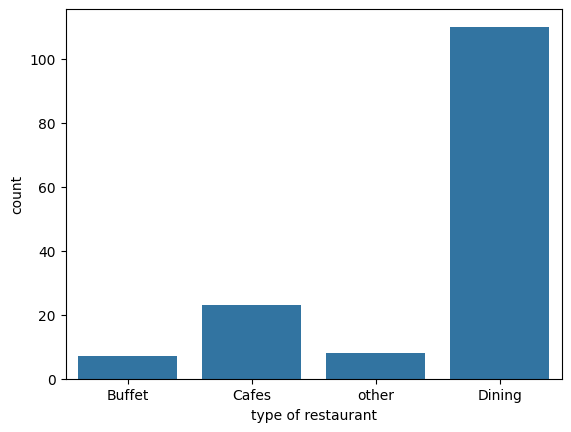

In [46]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restaurant")

## Conclusion- majority of the restaurant falls in dinning category

## Q.2  How many votes has each type of restaurant received from customers?

In [47]:
dataframe .head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

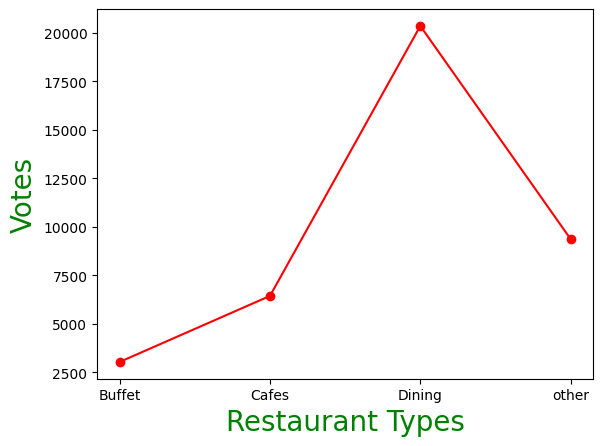

In [58]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame ({'votes':grouped_data})
plt.plot(result, c="red", marker="o")
plt.xlabel("Restaurant Types", c="green", size=20)
plt.ylabel("Votes", c= "green", size=20)

## conclusion - dining restaurant has recieved maximum votes

## Q.3 What are the ratings that the majority of restaurants have received?

In [60]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


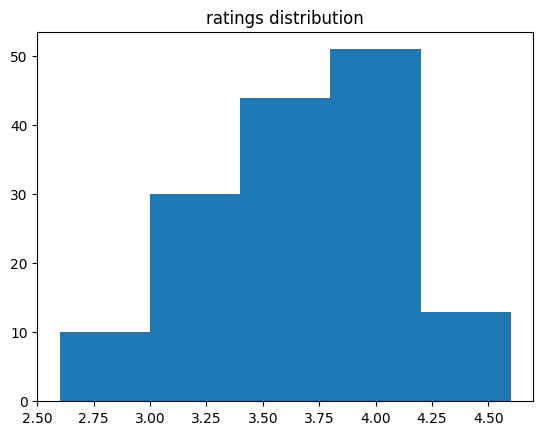

In [64]:
plt.hist(dataframe['rate'],bins=5)
plt.title("ratings distribution")
plt.show()

## conclusion - The majority restaurant received ratings from 3.5 to 4

## Q.4 What is the Average order spending by couples

In [69]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

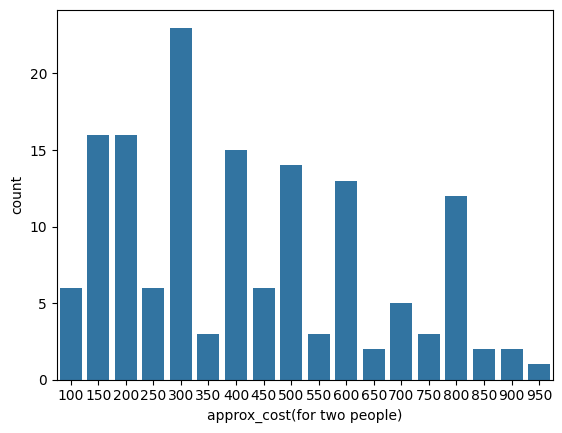

In [71]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

## Conclusion - Majority of couple prefers restaurant with an Approximate cost of 300 rupees

## Q.5 Which mode do restaurant received maximum rating?

In [73]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

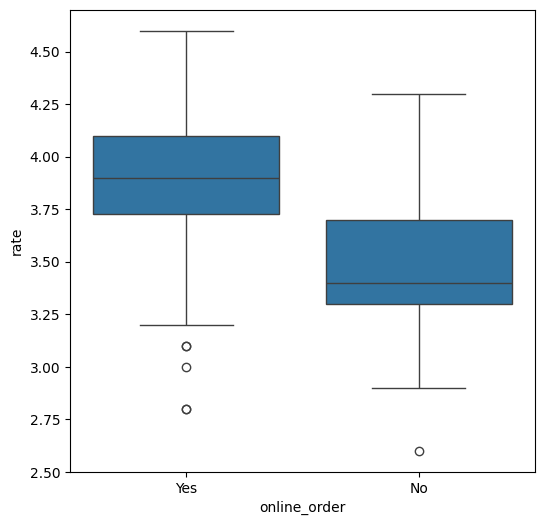

In [74]:
plt.figure(figsize=(6,6))
sns.boxplot(x= 'online_order', y='rate', data=dataframe)

## conclusion - Offline order receives lower rating in comparison to online.

## Q.6 Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers


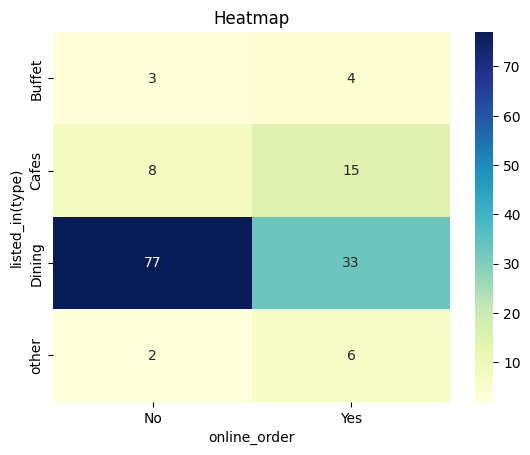

In [75]:
pivot_table = dataframe.pivot_table(index= 'listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("online_order")
plt.ylabel("listed_in(type)")
plt.show()

## Conclusion - Dining restaurant primarily receives more offline order, whereas cafes receives online order more than offline. This suggests that customers prefer orders in person at restaurant, but prefer online ordering at Cafes.